In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import numpy as np

In [7]:
df = pd.read_csv('u:/smc/public/SMC/DataScienceCourse/Scanpy/SMC_senate.csv', encoding = "ISO-8859-1")

In [8]:
br_df = df[df['party'].isin(['republican', 'democrat'])]

In [9]:
br_df.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,special,candidate,party,writein,mode,candidatevotes,totalvotes,unofficial,version
0,1976,Arizona,AZ,4,86,61,US Senate,statewide,gen,False,Sam Steiger,republican,False,total,321236,741210,False,20171011.0
2,1976,Arizona,AZ,4,86,61,US Senate,statewide,gen,False,Dennis DeConcini,democrat,False,total,400334,741210,False,20171011.0
6,1976,California,CA,6,93,71,US Senate,statewide,gen,False,S. I. (Sam) Hayakawa,republican,False,total,3748973,7470586,False,20171011.0
7,1976,California,CA,6,93,71,US Senate,statewide,gen,False,John V. Tunney,democrat,False,total,3502862,7470586,False,20171011.0
10,1976,Connecticut,CT,9,16,1,US Senate,statewide,gen,False,"Lowell P. Weicker, Jr.",republican,False,total,785683,1361666,False,20171011.0


# Votes

<AxesSubplot:xlabel='year', ylabel='candidatevotes'>

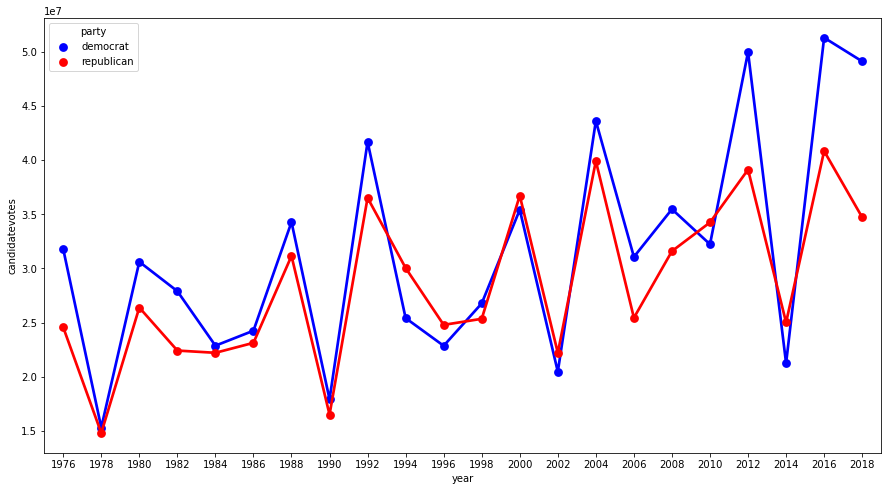

In [10]:
pivoted = br_df.pivot_table(values='candidatevotes', aggfunc=np.sum, index=['year', 'party']).reset_index()
plt.figure(figsize=[15,8])
sns.pointplot(data=pivoted,
            x='year', y='candidatevotes', hue='party', palette=['b', 'r'])

# Wins

In [11]:
reps = br_df[br_df['party']=='republican'].pivot_table(index=['year', 'state', 'party'], values='candidatevotes', 
                              aggfunc=np.max).reset_index()
dems = br_df[br_df['party']=='democrat'].pivot_table(index=['year', 'state', 'party'], values='candidatevotes', 
                              aggfunc=np.max).reset_index()


In [12]:
merged = reps.merge(dems, on=['year', 'state']).rename(columns={'candidatevotes_x':'RepublicanVotes', 
                                                                'candidatevotes_y':'DemocratVotes'})
merged['RepublicanWin'] = merged['RepublicanVotes']>merged['DemocratVotes']
merged['DemocratWin'] = ~merged['RepublicanWin']

In [13]:
combined_pivoted = merged.pivot_table(values=['RepublicanWin', 'DemocratWin', 'DemocratVotes', 'RepublicanVotes'], aggfunc=sum, 
                              index='year').reset_index()

In [14]:
wins = combined_pivoted.melt(value_vars=['RepublicanWin', 'DemocratWin'], id_vars=['year'])

votes = combined_pivoted.melt(value_vars=['RepublicanVotes', 'DemocratVotes'], id_vars=['year'])

In [15]:
wins['votes'] = votes['value']

<AxesSubplot:xlabel='year', ylabel='value'>

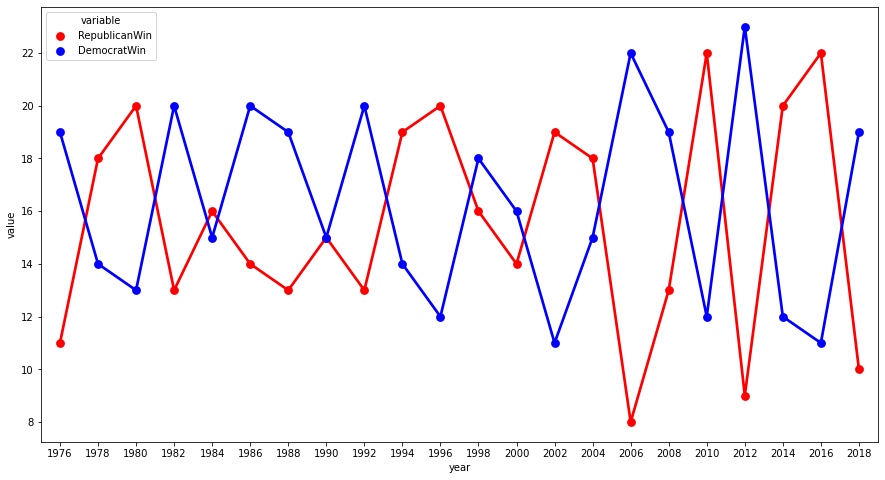

In [16]:
plt.figure(figsize=[15,8])
sns.pointplot(data=wins, x='year', y='value', hue='variable', palette=['r', 'b'], size='votes', sizes=(10,200))